In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from tqdm import tqdm
from src.models import OldSpaceNet

In [2]:
train_steps = 5000

n_in = 2 # 2 position inputs 
n_out = 100 # no. of spatial representations
bs = 128 # batch size 

model = OldSpaceNet(n_in, n_out, scale = 0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

loss_history = []
progress = tqdm(range(train_steps))
for i in progress: # train loop
    r = torch.tensor(np.random.uniform(-1, 1, (bs, 2)), dtype= torch.float32)
    loss = model.train_step(x = r, y = r, optimizer = optimizer)

    if i % 10 == 0:
        loss_history.append(loss)
        progress.set_description(f"loss: {loss:>7f}")

loss: 0.000424: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1179.88it/s]


Text(0, 0.5, 'Train Loss')

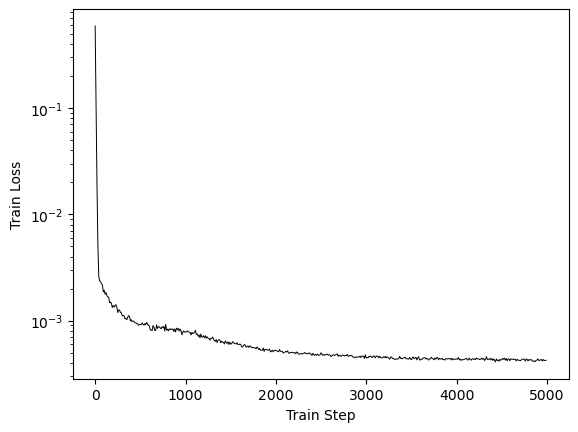

In [3]:
plt.semilogy(np.arange(0, train_steps, 10), loss_history, "-k", linewidth = 0.7)
plt.xlabel("Train Step")
plt.ylabel("Train Loss")

In [4]:
# evaluate on 32x32 grid
n = 32
x = np.linspace(-1, 1, n)
y = x.copy()
xx, yy = np.meshgrid(x,y)
u = torch.tensor(np.stack([xx.ravel(), yy.ravel()], axis = -1), dtype= torch.float32)
p = model.spatial_representation(u).detach().numpy()
print(np.amax(p), np.amin(p))
mask = np.mean(p, axis = 0) > 0

1.7359538 0.0


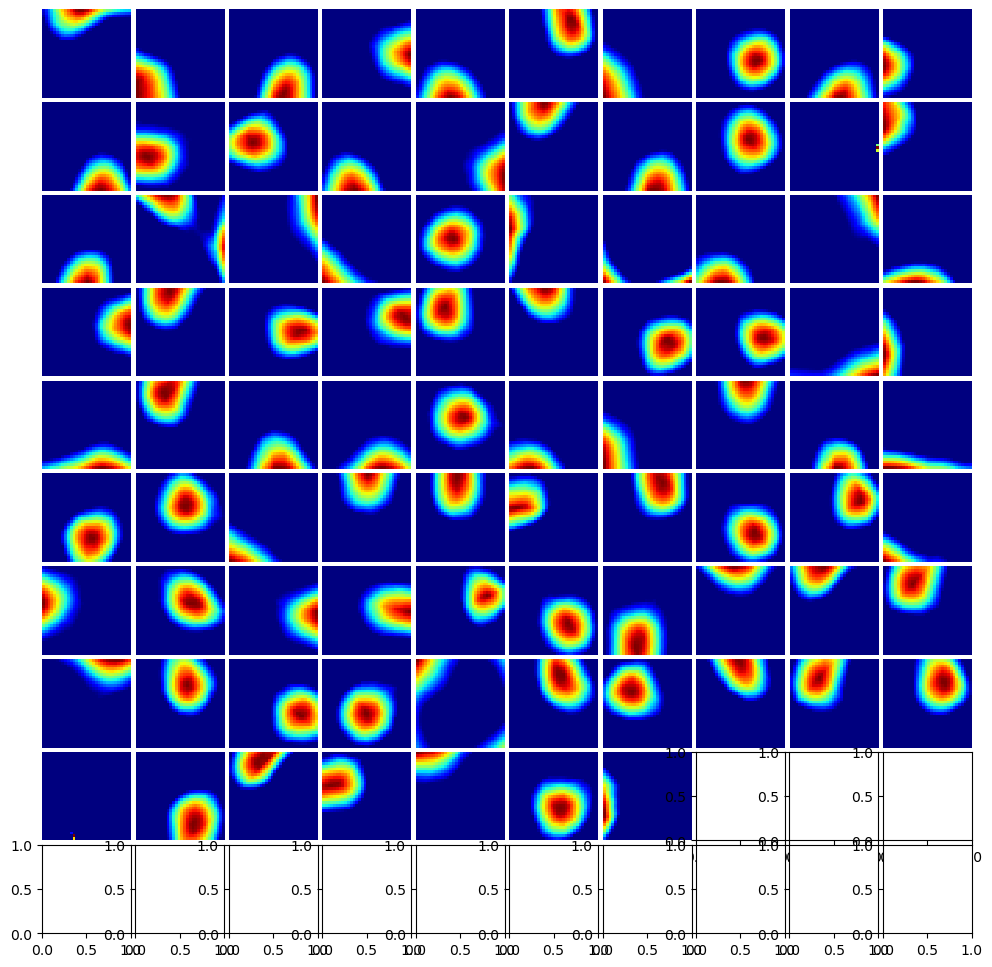

In [5]:
n_p = 10
fig, ax = plt.subplots(n_p, n_p, figsize =(12, 12))

for i, representation in enumerate(p.T[mask][:n_p**2]):

    row = i // n_p
    col = i % n_p
    ax[row, col].axis("off")

    representation = representation.reshape(n, n)

    ax[row, col].imshow(representation, cmap = "jet", interpolation = "none")

plt.subplots_adjust(wspace=0.05, hspace=0.05)

[-8.126734  -7.74736   -7.4364204 ... -7.8127394 -8.195059  -8.615722 ]


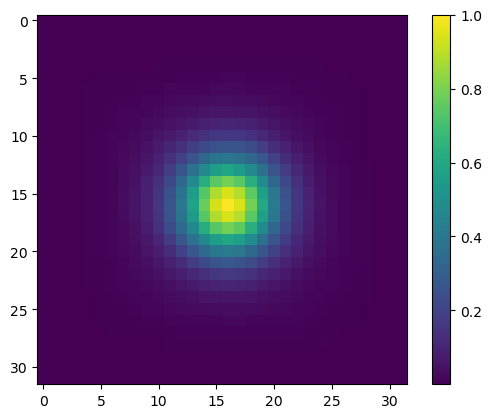

In [6]:
p0 = p[512+16]
sim = np.exp(-np.sum((p0[None] - p)**2, axis = -1))
print(np.log(sim))
plt.imshow(sim.reshape(32,32), interpolation = "None")
plt.colorbar()